# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/moltean/fruits

# Data Preprocessing

## Training Image preprocessing

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
                'Training',target_size=(64,64),batch_size=32,class_mode='categorical')

Found 67692 images belonging to 131 classes.


## Test Image preprocessing

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('Test',target_size=(64,64),batch_size=32,class_mode='categorical',shuffle=False)

Found 22688 images belonging to 131 classes.


# Building Model

In [9]:
cnn = tf.keras.models.Sequential()

## Building Convolution layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dense(units=131,activation='softmax'))

## Compiling and Training Phase

In [17]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
training_history = cnn.fit(x=training_set,validation_data=test_set,epochs=30)

Epoch 1/30
2116/2116 [==============================] - 655s 309ms/step - loss: 0.6982 - accuracy: 0.8026 - val_loss: 0.2865 - val_accuracy: 0.9244
Epoch 2/30
2116/2116 [==============================] - 718s 339ms/step - loss: 0.1217 - accuracy: 0.9635 - val_loss: 0.2100 - val_accuracy: 0.9580
Epoch 3/30
2116/2116 [==============================] - 746s 352ms/step - loss: 0.0849 - accuracy: 0.9768 - val_loss: 0.3851 - val_accuracy: 0.9318
Epoch 4/30
2116/2116 [==============================] - 778s 368ms/step - loss: 0.0724 - accuracy: 0.9814 - val_loss: 0.2194 - val_accuracy: 0.9621
Epoch 5/30
2116/2116 [==============================] - 803s 380ms/step - loss: 0.0640 - accuracy: 0.9846 - val_loss: 0.1640 - val_accuracy: 0.9821
Epoch 6/30
2116/2116 [==============================] - 805s 380ms/step - loss: 0.0615 - accuracy: 0.9871 - val_loss: 0.4036 - val_accuracy: 0.9518
Epoch 7/30
2116/2116 [==============================] - 802s 379ms/step - loss: 0.0577 - accuracy: 0.9885 - val_

## Saving Model

In [20]:
cnn.save("trained_model.h5")

In [22]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Calculating Accuracy of Model Achieved on Test set

In [111]:
print('Test set Accuracy: {} %'.format(training_history.history['val_accuracy'][-1]*100))

Test set Accuracy: 97.51850962638855 %


# Accuracy Visualization

## Training Visualization

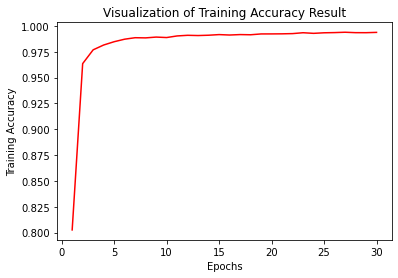

In [113]:
epochs=[i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title("Visualization of Training Accuracy Result")
plt.show()

## Validation Visualization

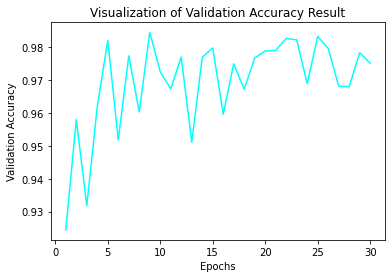

In [114]:
plt.plot(epochs,training_history.history['val_accuracy'],color='cyan')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title("Visualization of Validation Accuracy Result")
plt.show()